# Roots of Bessel functions

In the theory of vibrations of a circular drum, the displacement of the drumhead can be expressed in terms of pure harmonic modes, 

$$J_m(\omega_{k,m} r) \cos(m\theta) \cos(c \omega_{k,m} t),$$

where $(r,\theta)$ are polar coordinates, $0\le r\le 1$, $t$ is time, $m$ is a positive integer, $c$ is a material parameter, and $J_m$ is a _Bessel function of the first kind_. The quantity $\omega_{k,m}$ is a resonant frequency and is a positive root of the equation  

$$J_m(\omega_{k,m}) = 0,$$ 

which states that the drumhead is clamped around the rim. Tabulating approximations to the zeros of Bessel functions has occupied countless mathematician-hours throughout the centuries.

In [1]:
using FundamentalsNumericalComputation

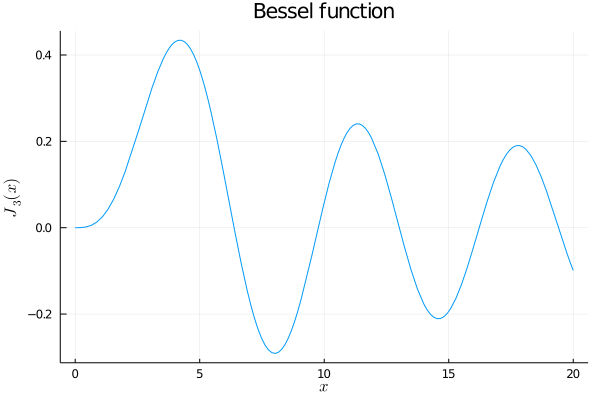

In [2]:
J3(x) = besselj(3,x)
plot(J3,0,20,
    grid=:xy, legend=:none,
    xaxis=("\$x\$"), yaxis=("\$J_3(x)\$"), title="Bessel function")

From the graph we see roots near 6, 10, 13, 16, and 19. We use `nlsolve` from the `NLsolve` package to find these roots accurately. (It uses vector variables, so we have to adapt it for use with scalars.)

In [3]:
omega = []
for guess = [6.,10.,13.,16.,19.]
    s = nlsolve(x->besselj(3,x[1]),[guess])
    omega = [omega;s.zero]
end

In [4]:
pretty_table([omega J3.(omega)],["root estimate" "function value"],backend=:html)


root estimate,function value
6.38016,2.47025e-15
9.76102,-8.37524e-14
13.0152,5.04846e-13
16.2235,6.93889e-18
19.4094,6.1269e-13


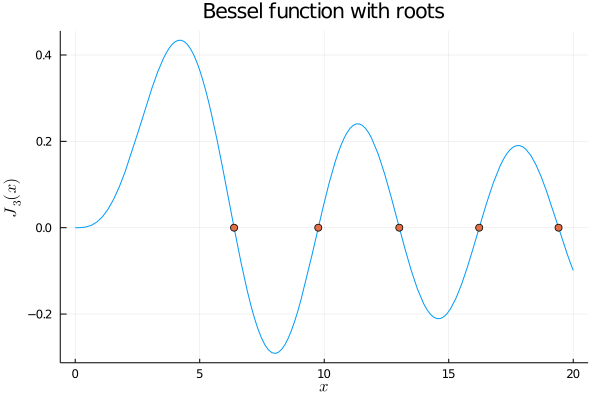

In [5]:
scatter!(omega,J3.(omega),title="Bessel function with roots")